Data Selection: which data are available? is data missing? can any data be removed?<br>
Data Preprocessing: format, clean, sample<br>
Data Transformation<br>
Data Storage: store the data in a convenient, easy-to-retrieve format (csv, database, etc.)<br>

Data Preprocessing in Unsupervised Learning<br>
Feature Selection<br>

---

## Prototype Clustering
K-Means or K-Centroid (continuous data)<br>
K-Medoid (categorical data)<br>

creates a one-level partitioning of the data objects<br>

Centroid: mean, median, etc.<br>
applied to data objects in a continuous n-dim space<br>
almost never corresponds to an actual data point<br>

Medoid: the most representative point of a group of points<br>
requires only a proximity measure for a pair of objects<br>
must be an actual data point<br>

### K-Means

Basic K-Means Algorithm
1. Select $K$ points as initial centroids.
2. __repeat__ (minimization of the objective function)
3. &nbsp;&nbsp;&nbsp;&nbsp; Form $K$ clusters by assigning each point to its closest centroid.
4. &nbsp;&nbsp;&nbsp;&nbsp; Recompute the centroid of each cluster.
5. __until__ Centroids do not change (or, at most 1% of points change clusters).

Choose<br>
&nbsp;&nbsp;&nbsp;&nbsp;
proximity measure<br>
&nbsp;&nbsp;&nbsp;&nbsp;
objective function<br>
&nbsp;&nbsp;&nbsp;&nbsp;
centroid<br>

Steps 3 & 4<br>
guaranteed to only find a local minimum w.r.t. the SSE, since they are based on optimizing the SSE for specific choices of the centroids and clusters rather than for all possible choices; this leads to suboptimal clustering<br>

Step 3<br>
Select a proximity measure; compute the proximity of each data point to each centroid; and assign the data point to the closest centroid<br>
Forms clusters by assigning points to their nearest centroid, which minimizes the objective function for the given set of centroids<br>


Step 4<br>
Select and optimize an objective function<br>
e.g., minimize the squared distance of each point to its closest centroid<br>
recomputes the centroids so as to further minimize the SSE<br>

$\textbf{x}$ data object<br>
$C_i$ the $i$th cluster<br>
$\textbf{c}_i$ the centroid of cluster $C_i$<br>
$\textbf{c}$ the centroid of all points<br>
$m_i$ the number of objects in the $i$th cluster<br>
$m$ the number of objects in the data set<br>
$K$ the number of clusters<br>

---

### K-Means of numerical data

the numerical data is represented as a design matrix<br>

__Proximity Measure: Euclidean Distance__<br>

Objective: to minimize the SSE of the cluster<br>

__Objective Function: SSE Sum of Squared Error__<br>
$$ \text{SSE} = \sum_{i = 1}^{K} \sum_{\textbf{x} \in C_i} dist(\textbf{c}_i, \textbf{x})^2 $$

__Centroid of the $i^{th}$ cluster: Mean__<br>
the centroid that minimizes the SSE is the mean<br>
$$\textbf{c}_i = \frac{1}{m_i} \sum_{\textbf{x} \in C_i} \textbf{x}$$

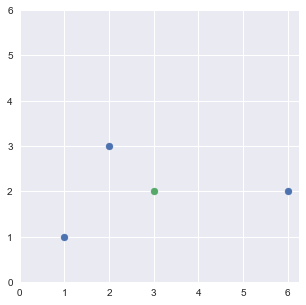

In [38]:
data = np.array([[1, 1], [2, 3], [6, 2]])
centroid = data.sum(axis=0) / data.shape[0]
plt.figure(figsize=(5, 5));
plt.scatter(data[:, 0], data[:, 1]);
plt.scatter(centroid[0], centroid[1]);
plt.xticks(np.arange(0, 7));
plt.yticks(np.arange(0, 7));

---

### K-Means of document data

the document data is represented as a document-term matrix<br>

__Proximity Measure: Cosine Similarity__<br>

Objective: to maximize the cohesion of the cluster (the similarity of the documents in a cluster to the cluster centroid)<br>

__Objective Function: Total Cohesion__<br>
$$ \text{Total Cohesion} = \sum_{i = 1}^{K} \sum_{\textbf{x} \in C_i} cosine(\textbf{c}_i, \textbf{x}) $$

__Centroid of the $i^{th}$ cluster: Mean__<br>
the centroid that maximizes cohesion is the mean<br>
$$\textbf{c}_i = \frac{1}{m_i} \sum_{\textbf{x} \in C_i} \textbf{x}$$

### K-Medoid

---

### Iris Data Set
150 records, 5 attributes<br>
Petal Length<br>
Petal Width<br>
Sepal Length<br>
Sepal Width<br>
Class: Iris Setosa, Iris Virginica, Iris Versicolor<br>

---

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import plotly.express as px
import hvplot.pandas

In [2]:
iris_df = pd.read_csv('data/iris.csv')

In [3]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_df.describe().round(3)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


---

In [6]:
iris_df = iris_df.drop('class', axis=1)
#iris_df.to_csv('data/new_iris_data.csv', index=False)

In [7]:
model = KMeans(n_clusters=3, random_state=5)
model.fit(iris_df)
pred = model.predict(iris_df)
iris_df['class'] = model.labels_
iris_df.hvplot.scatter(x='sepal_length', y='sepal_width', by='class')

:NdOverlay   [class]
   :Scatter   [sepal_length]   (sepal_width)

In [9]:
fig = px.scatter_3d(
    iris_df,
    x='petal_width',
    y='sepal_width',
    z='petal_length',
    color='class',
    symbol='class',
    size='sepal_width',
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))

In [10]:
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(iris_df)
    inertia.append(km.inertia_)
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x='k', y='inertia', title='Elbow Curve', xticks=k)

:Curve   [k]   (inertia)

In [41]:
iris_scaled = StandardScaler().fit_transform(iris_df)
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
df_iris_pca = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
pca.explained_variance_ratio_

array([0.59174783, 0.28586907])

In [42]:
inertia = []
k = list(range(1, 11))
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_iris_pca)
    inertia.append(km.inertia_)
elbow_data = {'k': k, 'inertia': inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x='k', y='inertia', title='Elbow Curve', xticks=k)

:Curve   [k]   (inertia)

In [43]:
model = KMeans(n_clusters=3, random_state=0)
model.fit(df_iris_pca)
pred = model.predict(df_iris_pca)
df_iris_pca['class'] = model.labels_
df_iris_pca.hvplot.scatter(x='PC1', y='PC2', hover_cols=['class'], by='class')

:NdOverlay   [class]
   :Scatter   [PC1]   (PC2,class)